In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('med_mental_health.csv')

In [2]:
df

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,1785,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,1787,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,1789,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [43]:
pd.set_option('display.max_rows', None)

In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
age - 0%
year - 0%
sex - 0%
glang - 0%
part - 0%
job - 0%
stud_h - 0%
health - 0%
psyt - 0%
jspe - 0%
qcae_cog - 0%
qcae_aff - 0%
amsp - 0%
erec_mean - 0%
cesd - 0%
stai_t - 0%
mbi_ex - 0%
mbi_cy - 0%
mbi_ea - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

id             int64
age            int64
year           int64
sex            int64
glang          int64
part           int64
job            int64
stud_h         int64
health         int64
psyt           int64
jspe           int64
qcae_cog       int64
qcae_aff       int64
amsp           int64
erec_mean    float64
cesd           int64
stai_t         int64
mbi_ex         int64
mbi_cy         int64
mbi_ea         int64
dtype: object


array([[<AxesSubplot: title={'center': 'stud_h'}>]], dtype=object)

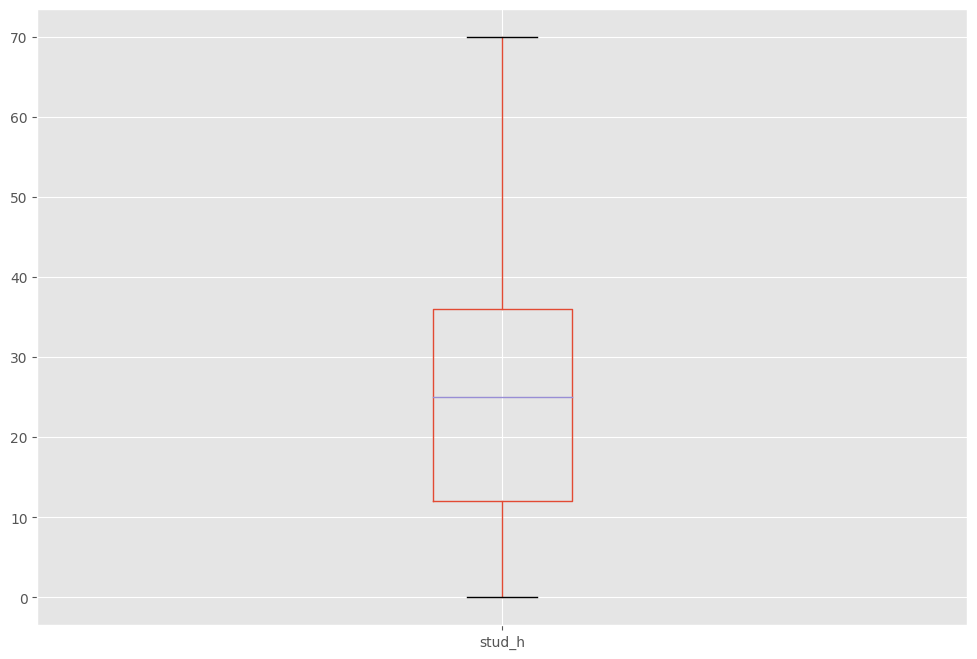

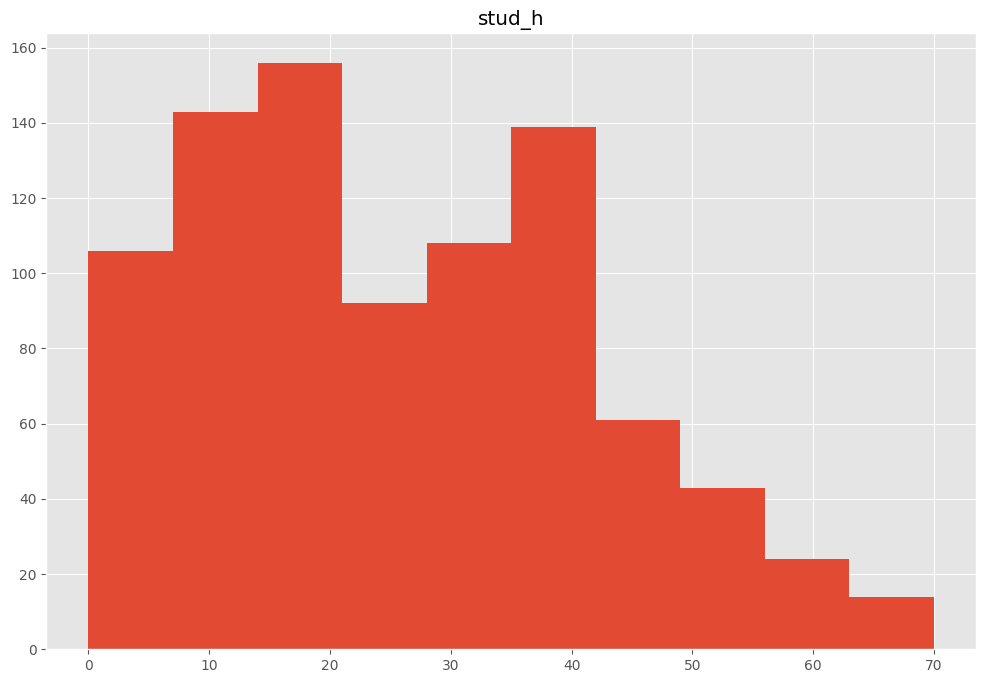

In [15]:
# Are there any Outliers?

df.boxplot(column=['stud_h'])

df.hist(column = ['stud_h'], bins = 10)


array([[<AxesSubplot: title={'center': 'cesd'}>]], dtype=object)

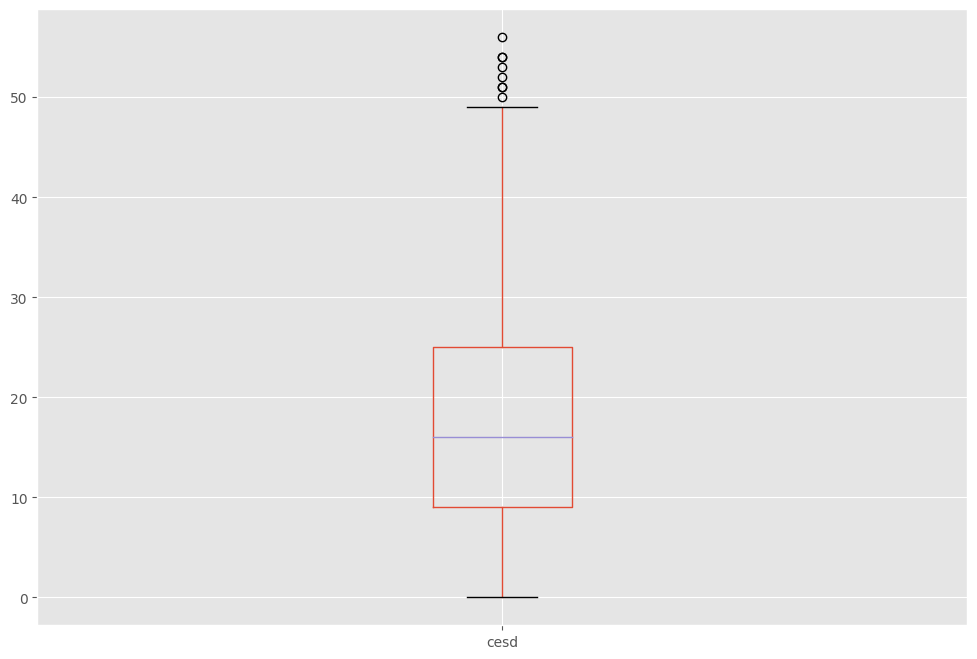

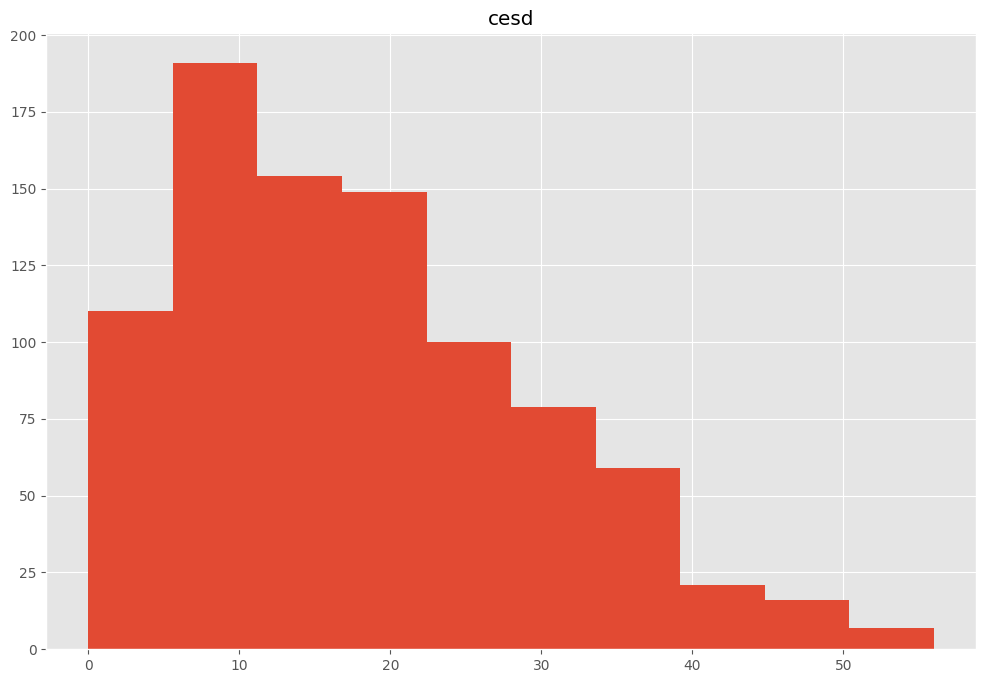

In [19]:
df.boxplot(column=['cesd'])

df.hist(column = ['cesd'])

array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

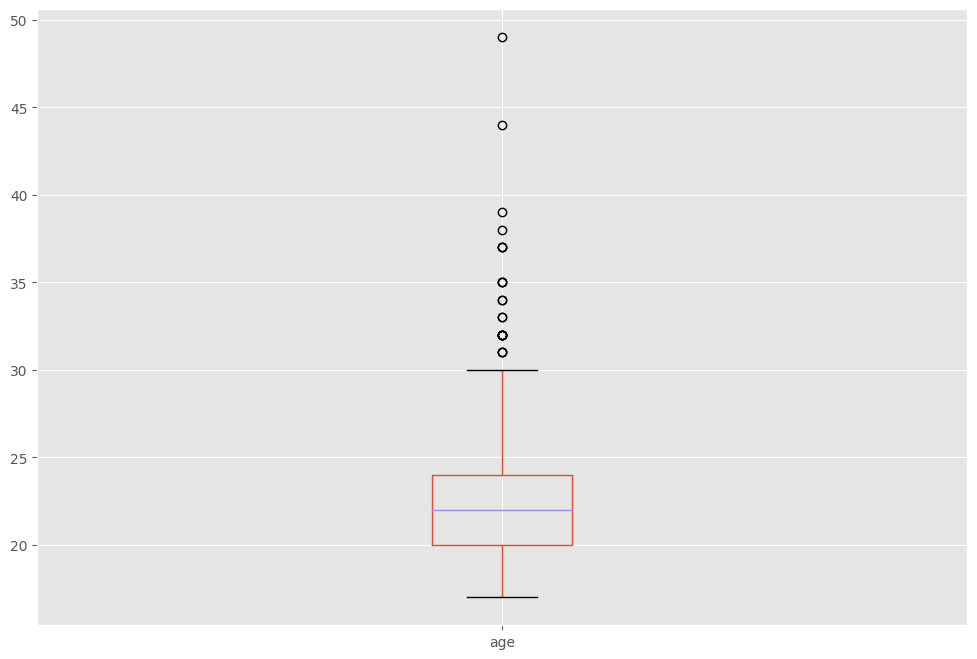

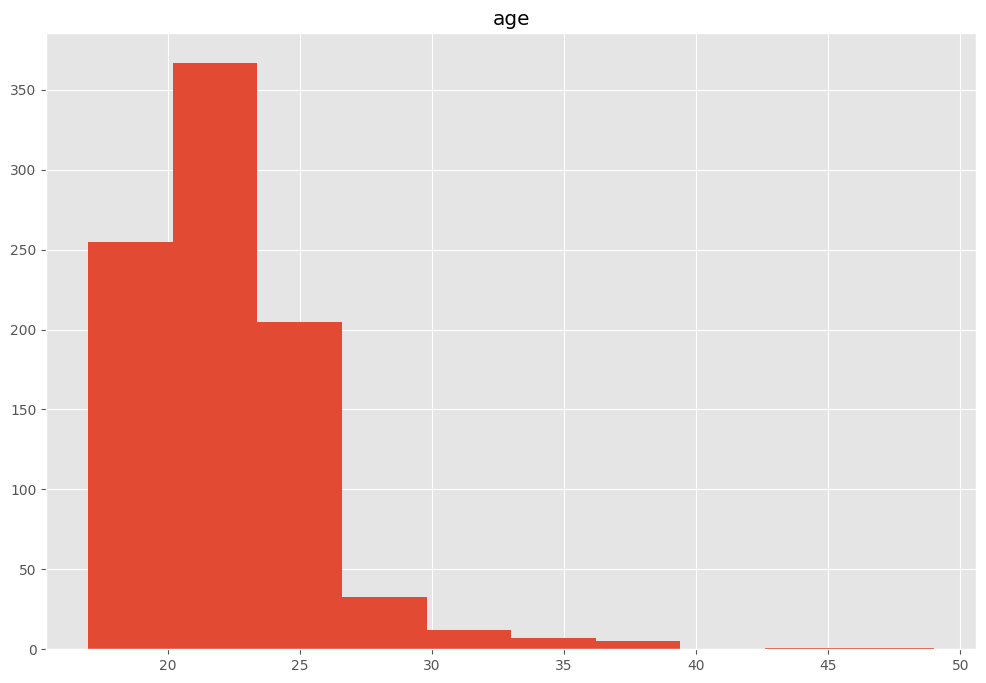

In [17]:
df.boxplot(column=['age'])

df.hist(column = ['age'])

In [50]:
# Order our Data a little bit to see

df.sort_values(by=['age'], inplace=False, ascending=False)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
417,829,49,3,2,104,1,0,16,5,0,115,67,39,24,0.809524,12,38,7,4,25
520,1030,44,5,2,1,0,1,35,1,1,98,53,25,20,0.833333,22,53,17,9,23
571,1154,39,4,2,37,1,1,2,2,0,98,65,37,22,0.476190,28,57,18,6,21
737,1478,38,2,2,15,1,0,55,3,0,111,57,39,21,0.785714,15,44,13,8,26
771,1548,37,4,2,1,1,1,10,3,0,116,65,38,25,0.833333,14,33,18,10,28
432,856,37,3,2,102,0,1,15,4,0,114,55,36,22,0.642857,22,56,12,4,30
60,126,37,6,2,15,0,0,20,3,0,107,68,39,17,0.595238,31,44,15,10,23
278,555,35,5,1,90,1,1,25,3,0,99,59,29,22,0.642857,40,65,25,24,15
393,779,35,4,2,106,1,1,5,3,0,104,39,27,21,0.642857,9,34,12,9,30
774,1555,35,2,2,20,1,1,40,5,0,110,69,40,30,0.476190,3,35,12,7,30


<AxesSubplot: xlabel='stud_h', ylabel='cesd'>

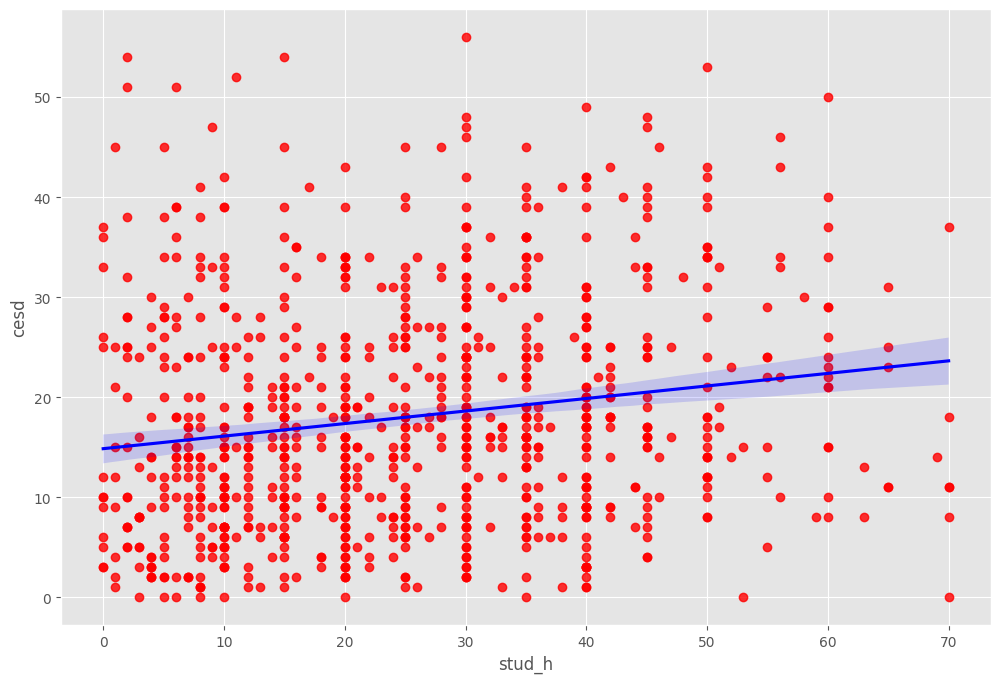

In [53]:
sns.regplot(x="stud_h", y="cesd", data=df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

<AxesSubplot: xlabel='cesd', ylabel='stai_t'>

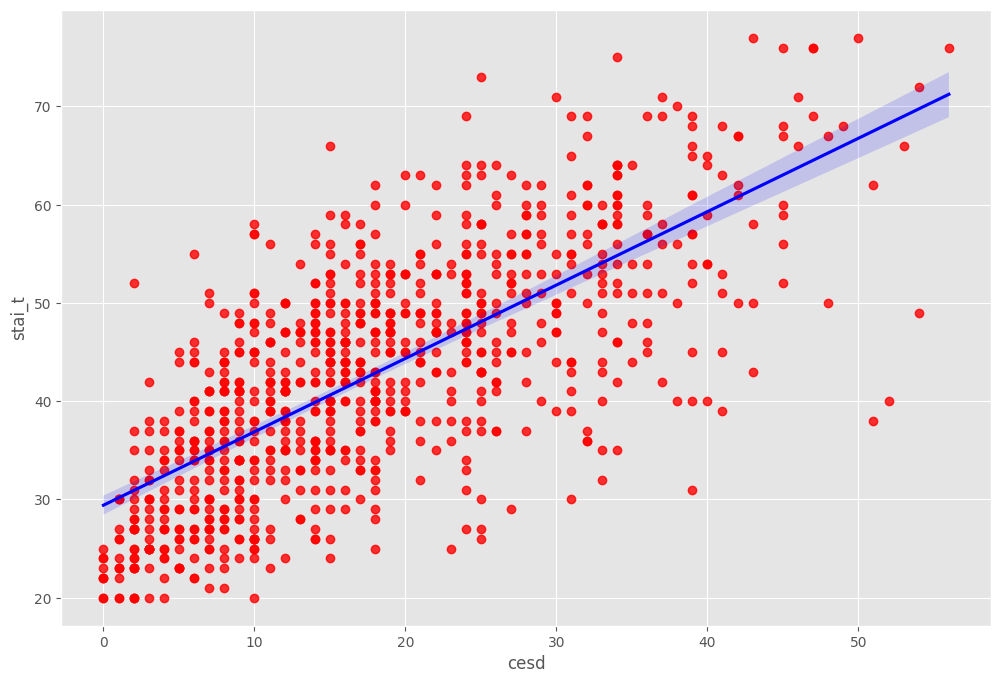

In [56]:
sns.regplot(x="cesd", y="stai_t", data=df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

In [30]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
id,1.000000,-0.015575,-0.017308,0.009421,-0.022209,0.020932,-0.013165,0.008610,0.002591,-0.034088,-0.043873,0.036164,-0.025341,0.014348,-0.003440,0.025713,-0.016218,-0.020312,-0.014694,0.027984
age,-0.015575,1.000000,0.592530,-0.072708,0.030363,0.187294,0.226448,-0.293557,-0.029800,0.015278,0.223221,0.059355,-0.008130,0.000477,-0.018699,-0.139106,-0.081893,-0.182733,-0.001853,0.046130
year,-0.017308,0.592530,1.000000,-0.057285,-0.101388,0.146825,0.216636,-0.521473,0.084023,0.000861,0.301176,0.076645,0.061427,-0.013683,0.080132,-0.242121,-0.164591,-0.244105,0.077246,-0.010216
sex,0.009421,-0.072708,-0.057285,1.000000,0.005641,0.000315,0.020879,-0.013806,-0.087907,0.158262,0.125781,0.115706,0.358691,-0.129970,0.210735,0.228820,0.250579,0.155591,0.018912,-0.043815
glang,-0.022209,0.030363,-0.101388,0.005641,1.000000,-0.049970,-0.050746,0.063462,-0.013567,-0.042818,-0.094676,-0.071495,-0.088361,-0.044275,-0.098981,0.098076,0.091851,0.038015,0.036921,-0.001697
part,0.020932,0.187294,0.146825,0.000315,-0.049970,1.000000,0.047603,-0.103950,0.077115,0.026840,0.122091,0.040388,0.009981,0.061602,0.030255,-0.106189,-0.072290,-0.012205,-0.018554,0.047845
job,-0.013165,0.226448,0.216636,0.020879,-0.050746,0.047603,1.000000,-0.202371,-0.022981,0.060138,0.077749,0.024697,-0.000171,0.028291,0.015056,-0.059803,-0.063029,-0.065522,0.009590,-0.018498
stud_h,0.008610,-0.293557,-0.521473,-0.013806,0.063462,-0.103950,-0.202371,1.000000,-0.073520,-0.033045,-0.134662,-0.023048,-0.032268,-0.001583,-0.056122,0.174085,0.152052,0.185804,-0.087386,0.101732
health,0.002591,-0.029800,0.084023,-0.087907,-0.013567,0.077115,-0.022981,-0.073520,1.000000,-0.137032,-0.003536,-0.026957,-0.063244,0.027197,0.024235,-0.358049,-0.305345,-0.285564,-0.188539,0.224193
psyt,-0.034088,0.015278,0.000861,0.158262,-0.042818,0.026840,0.060138,-0.033045,-0.137032,1.000000,0.048500,0.046266,0.123249,-0.072552,0.003468,0.268491,0.293282,0.177242,0.145702,-0.162544


In [31]:
df.corr(method ='kendall')

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
id,1.000000,-0.019481,-0.012860,0.008746,-0.006060,0.016794,-0.010859,0.007620,0.007487,-0.027916,-0.023678,0.032701,-0.016618,0.006884,0.009779,0.023997,-0.011655,-0.007946,-0.002706,0.025251
age,-0.019481,1.000000,0.645298,-0.094723,0.012611,0.173968,0.209802,-0.288175,0.003624,0.026032,0.183512,0.064035,0.008926,-0.010420,-0.005376,-0.143590,-0.082553,-0.126698,0.022191,0.026874
year,-0.012860,0.645298,1.000000,-0.057276,-0.057781,0.132535,0.198773,-0.405259,0.077296,0.005360,0.227169,0.069158,0.056819,-0.018986,0.064877,-0.186439,-0.111898,-0.172308,0.050296,0.002988
sex,0.008746,-0.094723,-0.057276,1.000000,0.008029,0.004501,0.020614,0.002319,-0.101313,0.159472,0.097981,0.101316,0.303683,-0.108287,0.174458,0.195040,0.215567,0.126192,0.013892,-0.032413
glang,-0.006060,0.012611,-0.057781,0.008029,1.000000,-0.065539,-0.012893,0.047368,-0.021047,-0.040392,-0.072661,-0.024583,-0.077374,-0.017636,-0.081695,0.056749,0.059793,0.030033,0.024173,0.012637
part,0.016794,0.173968,0.132535,0.004501,-0.065539,1.000000,0.047603,-0.090074,0.067319,0.026840,0.092478,0.030736,0.004916,0.049004,0.026559,-0.088262,-0.058052,-0.004694,-0.006856,0.042633
job,-0.010859,0.209802,0.198773,0.020614,-0.012893,0.047603,1.000000,-0.167775,-0.011678,0.060138,0.057012,0.021361,0.000556,0.023140,0.017105,-0.050847,-0.046867,-0.054004,0.012906,-0.011314
stud_h,0.007620,-0.288175,-0.405259,0.002319,0.047368,-0.090074,-0.167775,1.000000,-0.064133,-0.026658,-0.095316,-0.018168,-0.012758,-0.010257,-0.031396,0.136224,0.107538,0.141316,-0.055027,0.056624
health,0.007487,0.003624,0.077296,-0.101313,-0.021047,0.067319,-0.011678,-0.064133,1.000000,-0.141515,0.003854,-0.013053,-0.064869,0.035638,0.011646,-0.302724,-0.268719,-0.254213,-0.149117,0.203796
psyt,-0.027916,0.026032,0.005360,0.159472,-0.040392,0.026840,0.060138,-0.026658,-0.141515,1.000000,0.044329,0.041392,0.100637,-0.055030,0.002991,0.222181,0.230295,0.145814,0.124151,-0.144497


In [32]:
df.corr(method ='spearman')

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
id,1.000000,-0.028601,-0.017243,0.010752,-0.007514,0.020557,-0.013292,0.013562,0.010145,-0.034171,-0.034626,0.048436,-0.024974,0.009704,0.013078,0.035621,-0.016346,-0.012092,-0.003756,0.036399
age,-0.028601,1.000000,0.764242,-0.110460,0.014751,0.202544,0.244264,-0.393602,0.004400,0.030308,0.254778,0.088560,0.012170,-0.015555,-0.006829,-0.201390,-0.115827,-0.176734,0.030704,0.036871
year,-0.017243,0.764242,1.000000,-0.064695,-0.068339,0.149587,0.224348,-0.522042,0.093291,0.006049,0.306699,0.092370,0.076149,-0.026344,0.085294,-0.251138,-0.151855,-0.228114,0.065985,0.004007
sex,0.010752,-0.110460,-0.064695,1.000000,0.008358,0.004513,0.020671,0.002863,-0.110073,0.159913,0.118097,0.121936,0.363365,-0.129098,0.206620,0.236022,0.261569,0.150766,0.016550,-0.038685
glang,-0.007514,0.014751,-0.068339,0.008358,1.000000,-0.068226,-0.013421,0.059415,-0.023418,-0.042048,-0.091558,-0.031099,-0.096421,-0.021872,-0.100397,0.071449,0.075984,0.037165,0.029684,0.015509
part,0.020557,0.202544,0.149587,0.004513,-0.068226,1.000000,0.047603,-0.108255,0.073046,0.026840,0.111340,0.036841,0.005868,0.058367,0.031411,-0.106628,-0.070266,-0.005601,-0.008123,0.050701
job,-0.013292,0.244264,0.224348,0.020671,-0.013421,0.047603,1.000000,-0.201640,-0.012672,0.060138,0.068640,0.025604,0.000663,0.027561,0.020230,-0.061428,-0.056728,-0.064443,0.015292,-0.013455
stud_h,0.013562,-0.393602,-0.522042,0.002863,0.059415,-0.108255,-0.201640,1.000000,-0.081540,-0.032038,-0.139166,-0.025880,-0.018371,-0.014448,-0.044252,0.194153,0.154695,0.199091,-0.078043,0.080311
health,0.010145,0.004400,0.093291,-0.110073,-0.023418,0.073046,-0.012672,-0.081540,1.000000,-0.153553,0.005337,-0.016879,-0.082960,0.043963,0.014889,-0.381020,-0.342340,-0.321083,-0.187159,0.258090
psyt,-0.034171,0.030308,0.006049,0.159913,-0.042048,0.026840,0.060138,-0.032038,-0.153553,1.000000,0.053370,0.049614,0.120126,-0.065544,0.003537,0.268414,0.278749,0.174001,0.147100,-0.171844


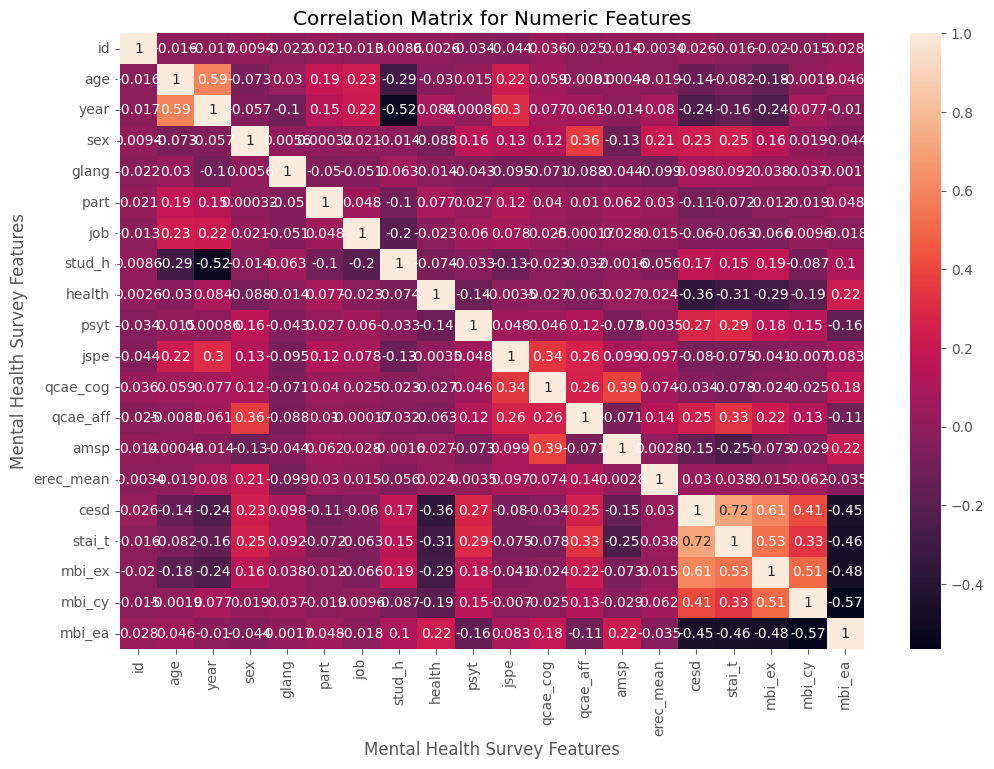

In [36]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Mental Health Survey Features")

plt.ylabel("Mental Health Survey Features")

plt.show()

<AxesSubplot: xlabel='health', ylabel='stud_h'>

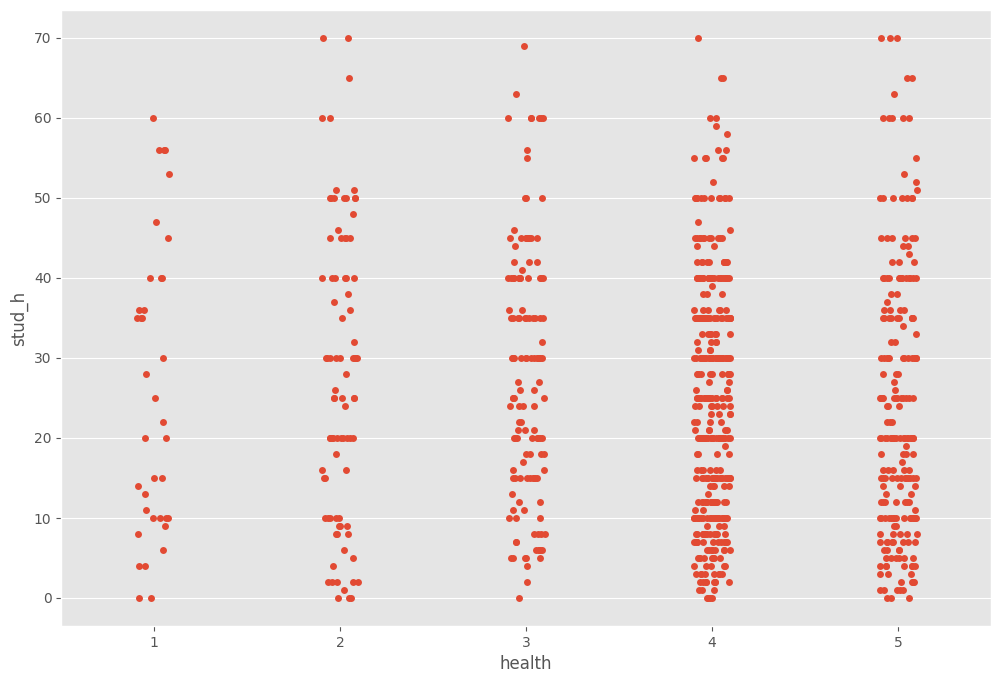

In [58]:
sns.stripplot(x="health", y="stud_h", data=df)